<a href="https://colab.research.google.com/github/VladPlusIn/internship_task/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the datasets
gps_data = pd.read_csv('/content/drive/MyDrive/Data Analyst Internship Tech Test.zip (Unzipped Files)/gps_data.csv')
imu_data = pd.read_csv('/content/drive/MyDrive/Data Analyst Internship Tech Test.zip (Unzipped Files)/imu_data.csv')

# Display the first few rows of each dataset
gps_data.head(), imu_data.head()

(    Serial Number               NZDT   Latitude   Longitude  GPS Heading  \
 0  004-0009-00481  16/10/20 17:27:15 -37.553447  175.459181           11   
 1  004-0009-00481  16/10/20 17:27:14 -37.553455  175.459178            3   
 2  004-0009-00481  16/10/20 17:27:13 -37.553470  175.459177          359   
 3  004-0009-00481  16/10/20 17:27:12 -37.553485  175.459177            6   
 4  004-0009-00481  16/10/20 17:27:10 -37.553496  175.459176            3   
 
    GPS Speed  
 0   0.938258  
 1   1.627387  
 2   1.680147  
 3   0.614859  
 4   1.594698  ,
     Serial Number               NZDT     Heading
 0  004-0009-00481  16/10/20 17:27:15  373.461806
 1  004-0009-00481  16/10/20 17:27:14  364.935411
 2  004-0009-00481  16/10/20 17:27:13  342.940320
 3  004-0009-00481  16/10/20 17:27:12  351.169082
 4  004-0009-00481  16/10/20 17:27:10  345.652691)

In [4]:
# Convert timestamps to datetime for proper merging
gps_data['NZDT'] = pd.to_datetime(gps_data['NZDT'])
imu_data['NZDT'] = pd.to_datetime(imu_data['NZDT'])

# Merge data on Serial Number and Timestamp
merged_data = pd.merge(gps_data, imu_data, on=['Serial Number', 'NZDT'], how='inner')

# Display the merged data
merged_data.head()

<ipython-input-4-c46c1ba71a74>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gps_data['NZDT'] = pd.to_datetime(gps_data['NZDT'])
<ipython-input-4-c46c1ba71a74>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  imu_data['NZDT'] = pd.to_datetime(imu_data['NZDT'])


,Serial Number,NZDT,Latitude,Longitude,GPS Heading,GPS Speed,Heading
0,004-0009-00481,2020-10-16 17:27:15,-37.553447,175.459181,11,0.938258,373.461806
1,004-0009-00481,2020-10-16 17:27:14,-37.553455,175.459178,3,1.627387,364.935411
2,004-0009-00481,2020-10-16 17:27:13,-37.553470,175.459177,359,1.680147,342.940320
3,004-0009-00481,2020-10-16 17:27:12,-37.553485,175.459177,6,0.614859,351.169082
4,004-0009-00481,2020-10-16 17:27:10,-37.553496,175.459176,3,1.594698,345.652691


from matplotlib import pyplot as plt
_df_0['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['GPS Heading'].plot(kind='hist', bins=20, title='GPS Heading')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['GPS Speed'].plot(kind='hist', bins=20, title='GPS Speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Longitude', y='GPS Heading', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='GPS Heading', y='GPS Speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='GPS Speed', y='Heading', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['Latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('Latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['Longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('Longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['GPS Heading']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('GPS Heading')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['GPS Speed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('GPS Speed')

from matplotlib import pyplot as plt
_df_12['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['GPS Heading'].plot(kind='line', figsize=(8, 4), title='GPS Heading')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['GPS Speed'].plot(kind='line', figsize=(8, 4), title='GPS Speed')
plt.gca().spines[['top', 'right']].set_visible(False)

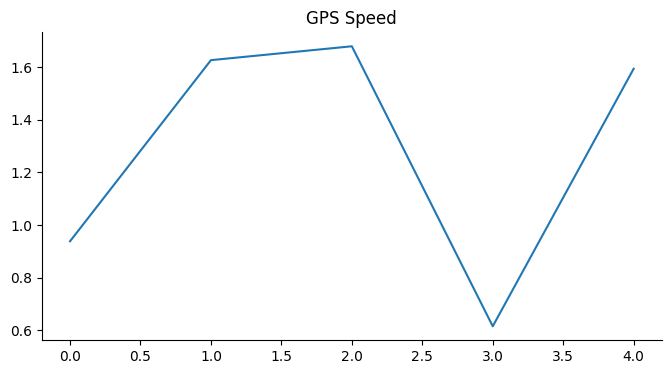

In [23]:
from matplotlib import pyplot as plt
_df_15['GPS Speed'].plot(kind='line', figsize=(8, 4), title='GPS Speed')
plt.gca().spines[['top', 'right']].set_visible(False)

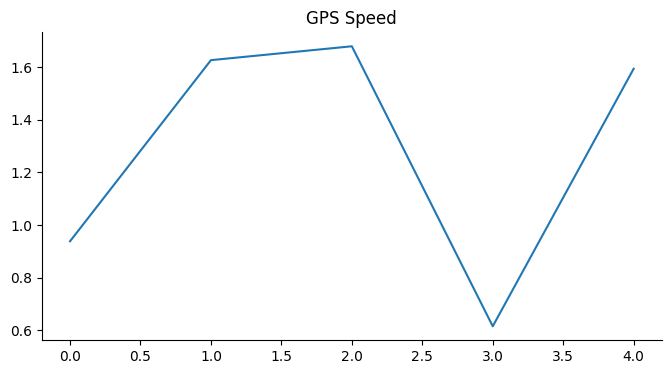

In [24]:
from matplotlib import pyplot as plt
_df_15['GPS Speed'].plot(kind='line', figsize=(8, 4), title='GPS Speed')
plt.gca().spines[['top', 'right']].set_visible(False)

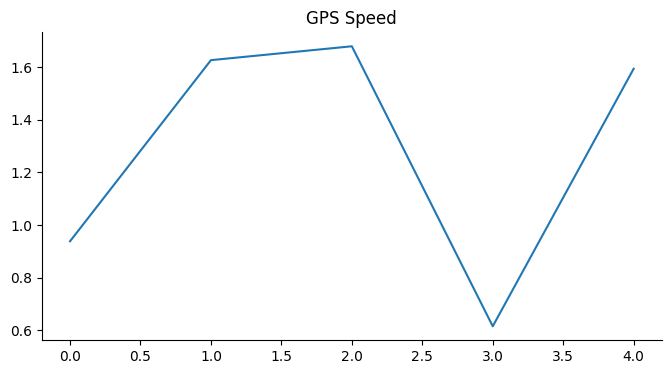

In [25]:
from matplotlib import pyplot as plt
_df_15['GPS Speed'].plot(kind='line', figsize=(8, 4), title='GPS Speed')
plt.gca().spines[['top', 'right']].set_visible(False)

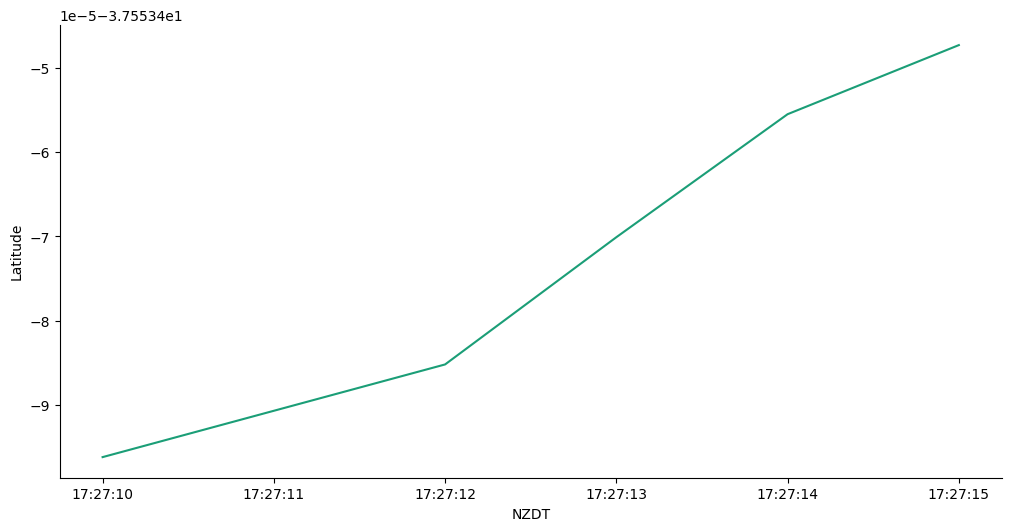

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NZDT']
  ys = series['Latitude']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('NZDT', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NZDT')
_ = plt.ylabel('Latitude')

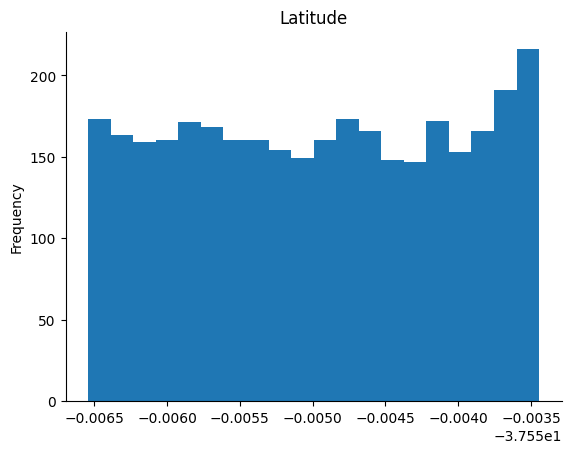

In [16]:
# @title Latitude

from matplotlib import pyplot as plt
merged_data['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

2. Data Visualization and Analysis
Calculate and Compare Headings

In [5]:
# Calculate the difference between IMU heading and GPS heading
merged_data['Heading Difference'] = merged_data['Heading'] - merged_data['GPS Heading']

# Normalize the heading difference to be within the range [-180, 180]
merged_data['Heading Difference'] = ((merged_data['Heading Difference'] + 180) % 360) - 180

# Summary statistics
heading_summary = merged_data['Heading Difference'].describe()
heading_summary

count    3309.000000
mean        0.630861
std        20.811906
min      -107.293878
25%       -15.749365
50%        -1.301963
75%        17.524708
max       138.019127
Name: Heading Difference, dtype: float64

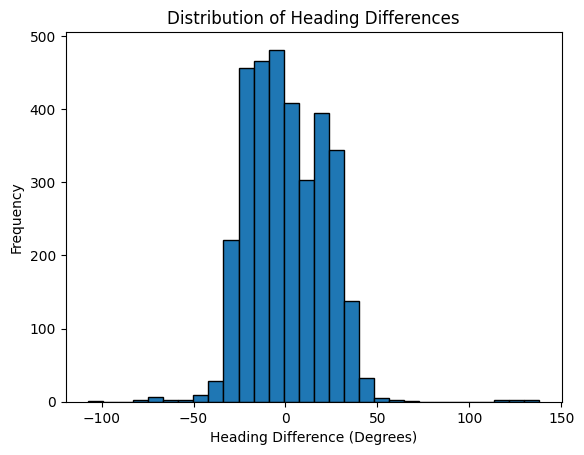

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of heading differences
plt.hist(merged_data['Heading Difference'], bins=30, edgecolor='black')
plt.xlabel('Heading Difference (Degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Heading Differences')
plt.show()

In [8]:
# Identify any anomalies (e.g., large heading differences)
anomalies = merged_data[abs(merged_data['Heading Difference']) > 90]  # arbitrary threshold for example
anomalies

,Serial Number,NZDT,Latitude,Longitude,GPS Heading,GPS Speed,Heading,Heading Difference
1023,004-0007-00034,2020-10-16 16:11:04,-37.554673,175.459146,316,0.585964,208.706122,-107.293878
1668,004-0007-00041,2020-10-16 16:38:31,-37.554065,175.459203,294,0.079224,60.245443,126.245443
1669,004-0007-00041,2020-10-16 16:38:30,-37.554065,175.459203,294,0.042554,72.019127,138.019127
1670,004-0007-00041,2020-10-16 16:38:29,-37.554064,175.459203,294,0.000000,67.037227,133.037227
1671,004-0007-00041,2020-10-16 16:38:27,-37.554064,175.459203,294,0.034510,54.737316,120.737316
1672,004-0007-00041,2020-10-16 16:38:26,-37.554064,175.459203,294,0.041144,53.832797,119.832797
1995,004-0006-00014,2020-10-16 16:00:50,-37.555783,175.459148,25,0.430034,149.421299,124.421299


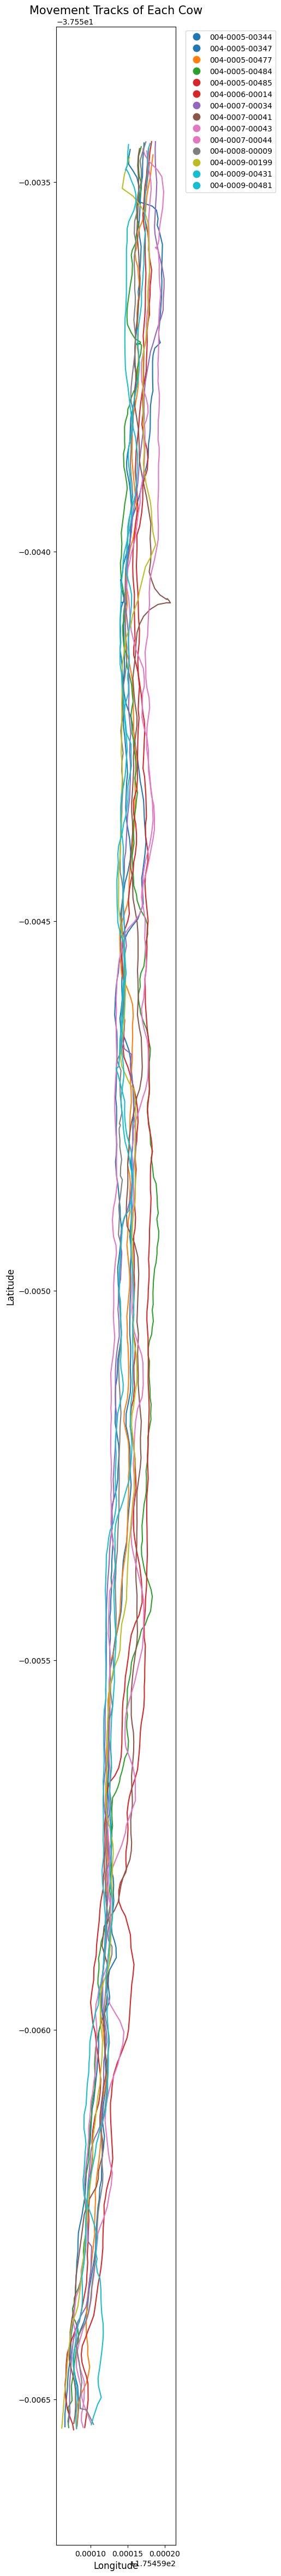

In [15]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

# Assuming the data has been merged as merged_data
# Group data by serial number
cow_groups = merged_data.groupby('Serial Number')

# Create a GeoDataFrame to hold the tracks
gdf_list = []

for name, group in cow_groups:
    # Create LineString from the points
    line = LineString(zip(group['Longitude'], group['Latitude']))
    gdf_list.append({'Serial Number': name, 'geometry': line})

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(gdf_list)

# Plot the tracks with improved readability
fig, ax = plt.subplots(figsize=(10, 60))

gdf.plot(ax=ax, column='Serial Number', legend=True, legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
ax.set_title('Movement Tracks of Each Cow', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Enhance readability of ticks and labels
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

In [18]:
pip install plotly

In [22]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add a scatter plot for each cow
for serial_number, group in merged_data.groupby('Serial Number'):
    fig.add_trace(go.Scatter(
        x=group['Longitude'],
        y=group['Latitude'],
        mode='lines+markers',
        name=serial_number,
        text=group['NZDT'].astype(str)  # Adding timestamp as hover text
    ))

# Add a slider
fig.update_layout(
    title='Movement Tracks of Each Cow',
    xaxis_title='Longitude',
    yaxis_title='Latitude',
    sliders=[{
        'steps': [
            {'method': 'update', 'label': str(time), 'args': [
                {'visible': [time == t for t in merged_data['NZDT']]},
                {'title': f'Time: {time}'}
            ]} for time in merged_data['NZDT'].unique()
        ],
        'currentvalue': {'prefix': 'Time: '}
    }]
)

# Show the figure
fig.show()

In [26]:
# Calculate the average speed of each cow and the overall average speed
average_speed_by_cow = merged_data.groupby('Serial Number')['GPS Speed'].mean()
overall_average_speed = merged_data['GPS Speed'].mean()

average_speed_by_cow, overall_average_speed

(Serial Number
 004-0005-00344    1.326385
 004-0005-00347    1.044642
 004-0005-00477    1.254420
 004-0005-00484    0.927193
 004-0005-00485    1.318153
 004-0006-00014    1.280975
 004-0007-00034    1.269177
 004-0007-00041    1.347545
 004-0007-00043    1.088124
 004-0007-00044    1.280191
 004-0008-00009    1.203331
 004-0009-00199    1.225963
 004-0009-00431    1.241355
 004-0009-00481    1.251103
 Name: GPS Speed, dtype: float64,
 1.2061648155406468)

In [27]:
import plotly.express as px
# Create an interactive map
fig = px.scatter_mapbox(
    merged_data,
    lat="Latitude",
    lon="Longitude",
    color="Serial Number",
    hover_name="Serial Number",
    hover_data={"NZDT": True, "GPS Speed": True},
    title="Movement Tracks of Each Cow",
    mapbox_style="open-street-map"
)

# Show the figure
fig.show()

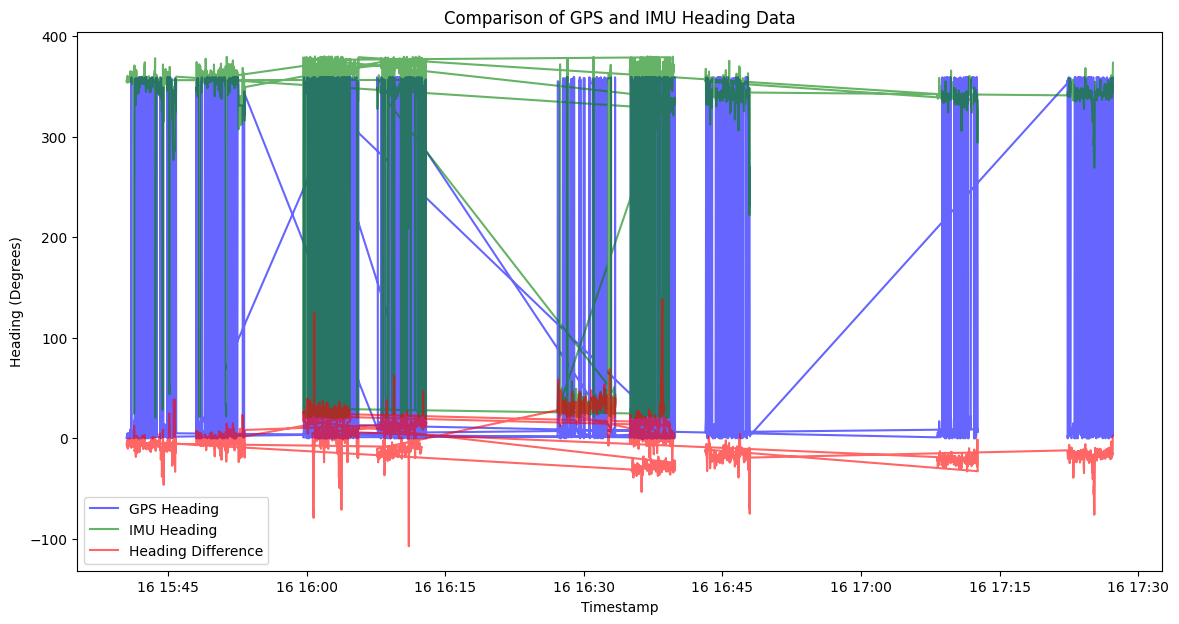

In [28]:
# Plot the GPS heading and IMU heading for comparison
fig, ax = plt.subplots(figsize=(14, 7))

# Plot GPS heading
ax.plot(merged_data['NZDT'], merged_data['GPS Heading'], label='GPS Heading', color='blue', alpha=0.6)

# Plot IMU heading
ax.plot(merged_data['NZDT'], merged_data['Heading'], label='IMU Heading', color='green', alpha=0.6)

# Plot heading difference
ax.plot(merged_data['NZDT'], merged_data['Heading Difference'], label='Heading Difference', color='red', alpha=0.6)

# Add titles and labels
ax.set_title('Comparison of GPS and IMU Heading Data')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Heading (Degrees)')
ax.legend()

# Display the plot
plt.show()

In [29]:
# Calculate the 3 quantiles (25th, 50th, and 75th percentiles)
quantiles = merged_data['Heading Difference'].quantile([0.25, 0.5, 0.75])

# Calculate the interquartile range (IQR)
IQR = quantiles[0.75] - quantiles[0.25]

# Define the threshold as 1.5 times the IQR above the 75th percentile and below the 25th percentile
lower_threshold = quantiles[0.25] - 1.5 * IQR
upper_threshold = quantiles[0.75] + 1.5 * IQR

# Identify anomalies based on the calculated thresholds
anomalies = merged_data[(merged_data['Heading Difference'] < lower_threshold) |
                        (merged_data['Heading Difference'] > upper_threshold)]

lower_threshold, upper_threshold, anomalies

(-65.66047555000017,
 67.43581845000023,
        Serial Number                NZDT   Latitude   Longitude  GPS Heading  \
 95    004-0009-00481 2020-10-16 17:25:16 -37.554699  175.459136          345   
 96    004-0009-00481 2020-10-16 17:25:14 -37.554699  175.459136          345   
 97    004-0009-00481 2020-10-16 17:25:13 -37.554699  175.459135          345   
 241   004-0009-00431 2020-10-16 16:47:57 -37.553478  175.459150           17   
 244   004-0009-00431 2020-10-16 16:47:54 -37.553483  175.459148          323   
 787   004-0008-00009 2020-10-16 16:03:47 -37.554688  175.459136          351   
 788   004-0008-00009 2020-10-16 16:03:46 -37.554689  175.459136          347   
 933   004-0008-00009 2020-10-16 16:00:46 -37.556512  175.459086          303   
 934   004-0008-00009 2020-10-16 16:00:45 -37.556511  175.459086          303   
 935   004-0008-00009 2020-10-16 16:00:44 -37.556512  175.459086          303   
 936   004-0008-00009 2020-10-16 16:00:43 -37.556513  175.459086    

In [30]:
import numpy as np

def calculate_endpoint(lat, lon, heading, distance=0.0001):
    """
    Calculate the endpoint of the vector given a starting point, heading, and distance.
    """
    R = 6371e3  # Earth's radius in meters
    lat1 = np.radians(lat)
    lon1 = np.radians(lon)
    heading = np.radians(heading)

    lat2 = np.arcsin(np.sin(lat1) * np.cos(distance / R) + np.cos(lat1) * np.sin(distance / R) * np.cos(heading))
    lon2 = lon1 + np.arctan2(np.sin(heading) * np.sin(distance / R) * np.cos(lat1), np.cos(distance / R) - np.sin(lat1) * np.sin(lat2))

    return np.degrees(lat2), np.degrees(lon2)

# Calculate the endpoints for each row in the merged data
merged_data['End Latitude'], merged_data['End Longitude'] = zip(*merged_data.apply(
    lambda row: calculate_endpoint(row['Latitude'], row['Longitude'], row['Heading']), axis=1))

# Create a figure
fig = go.Figure()

# Add arrows for each cow's heading
for serial_number, group in merged_data.groupby('Serial Number'):
    fig.add_trace(go.Scattermapbox(
        mode='markers+lines',
        lon=np.concatenate([group['Longitude'].values, group['End Longitude'].values]),
        lat=np.concatenate([group['Latitude'].values, group['End Latitude'].values]),
        marker={'size': 10},
        line=dict(width=2),
        name=serial_number,
        text=group['NZDT'].astype(str)  # Adding timestamp as hover text
    ))

# Update layout for the map
fig.update_layout(
    title='Movement Tracks of Each Cow with Heading Vectors',
    mapbox=dict(
        style='open-street-map',
        zoom=15,
        center=dict(lat=merged_data['Latitude'].mean(), lon=merged_data['Longitude'].mean())
    ),
    showlegend=True
)

# Show the figure
fig.show()

In [31]:
# Define a function to calculate the end point of the vector
def calculate_endpoint(lat, lon, heading, distance=0.0001):
    """
    Calculate the endpoint of the vector given a starting point, heading, and distance.
    """
    R = 6371e3  # Earth's radius in meters
    lat1 = np.radians(lat)
    lon1 = np.radians(lon)
    heading = np.radians(heading)

    lat2 = np.arcsin(np.sin(lat1) * np.cos(distance / R) + np.cos(lat1) * np.sin(distance / R) * np.cos(heading))
    lon2 = lon1 + np.arctan2(np.sin(heading) * np.sin(distance / R) * np.cos(lat1), np.cos(distance / R) - np.sin(lat1) * np.sin(lat2))

    return np.degrees(lat2), np.degrees(lon2)

# Calculate the endpoints for each row in the merged data
merged_data['End Latitude'], merged_data['End Longitude'] = zip(*merged_data.apply(
    lambda row: calculate_endpoint(row['Latitude'], row['Longitude'], row['Heading']), axis=1))

# Create a figure
fig = go.Figure()

# Add arrows for each cow's heading
for serial_number, group in merged_data.groupby('Serial Number'):
    fig.add_trace(go.Scattermapbox(
        mode='markers+lines',
        lon=np.concatenate([group['Longitude'].values, group['End Longitude'].values]),
        lat=np.concatenate([group['Latitude'].values, group['End Latitude'].values]),
        marker={'size': 10},
        line=dict(width=2),
        name=serial_number,
        text=group['NZDT'].astype(str)  # Adding timestamp as hover text
    ))

# Update layout for the map
fig.update_layout(
    title='Movement Tracks of Each Cow with Heading Vectors',
    mapbox=dict(
        style='open-street-map',
        zoom=15,
        center=dict(lat=merged_data['Latitude'].mean(), lon=merged_data['Longitude'].mean())
    ),
    showlegend=True
)

# Show the figure
fig.show()

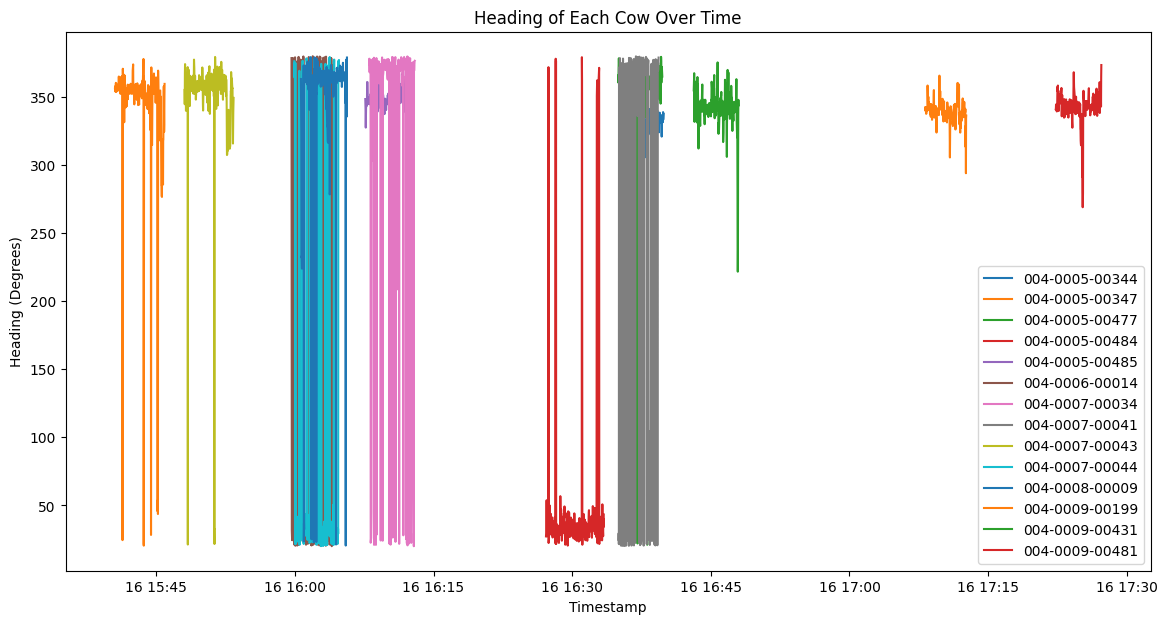

In [32]:
# Plot the heading of each cow over time
fig, ax = plt.subplots(figsize=(14, 7))

for serial_number, group in merged_data.groupby('Serial Number'):
    ax.plot(group['NZDT'], group['Heading'], label=serial_number)

ax.set_title('Heading of Each Cow Over Time')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Heading (Degrees)')
ax.legend()

plt.show()